In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from IPython.display import display

# comments
- It just so happened that the min/max data wasn't available during 2020 for some reason for this particular station, so we'll have to make due with just the averages
- The data for this area 

In [2]:
dt_start,dt_end = datetime.datetime(2020,1,1,0,0,0), datetime.datetime(2020,12,31,23,59,59)

URL_drainage_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Drainage data/'
URL_drainage_2020_file = URL_drainage_data + 'F-RVK-ANA-RS301.csv'
# URL_drainage_height_2020_file = URL_drainage_data + 'F-RVK-ING-HS111.csv'

df_dr = pd.read_csv(URL_drainage_2020_file,dtype = {'Val':'float'})
df_dr.CTime = pd.to_datetime(df_dr.CTime)
df_dr = df_dr[(df_dr.Flag == 0) & (df_dr.CType == 4)]
y_flow = pd.pivot_table(df_dr,values='Val',index='CTime',columns='Name')
y_flow = y_flow.resample('1h').mean().fillna(method = 'ffill')
y_flow = y_flow.loc[:,'F-RVK-ANA-RS301-RS']
# df_he = pd.read_csv(URL_drainage_height_2020_file)
# df_he.CTime = pd.to_datetime(df_he.CTime)
# df_he_mean = df_he[(df_he.Flag == 0) & (df_he.CType == 4)]
# df_he_max = df_he[(df_he.Flag == 0) & (df_he.CType == 9)]
# df_he_min = df_he[(df_he.Flag == 0) & (df_he.CType == 7)]

# y_height_mean = pd.pivot_table(df_he,values='Val',index='CTime',columns='Name')
# y_height_max  = pd.pivot_table(df_he,values='Val',index='PTime',columns='Name')
# y_height_min  = pd.pivot_table(df_he,values='Val',index='PTime',columns='Name')
# y_height_max.index = pd.DatetimeIndex(y_height_max.index)
# y_height_min.index = pd.DatetimeIndex(y_height_min.index)
# y_height = y_height.resample('1h').mean().fillna(method = 'ffill')


# crop to within 2020
# y_height_mean = y_height_mean.loc[dt_start:dt_end]
y_flow = y_flow.loc[dt_start:dt_end]
# y_height_mean = y_height_mean.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]
# y_height_max = y_height_max.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]
# y_height_min = y_height_min.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]

C:\Users\sverrirhd\Anaconda3\envs\gis_wradlib_torch\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


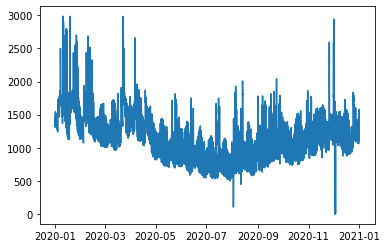

In [3]:
plt.plot(y_flow)

In [4]:
y_flow = y_flow[y_flow > 400]
y_flow = y_flow.resample('1h').mean().interpolate(method='linear')

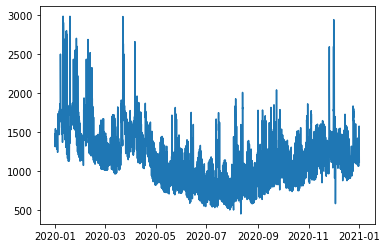

In [5]:
plt.plot(y_flow)

In [6]:
y_flow.to_pickle('drainage_ANA_target')

In [17]:
import scipy
fft_values = scipy.fft.fft(y_flow.values)

In [72]:
len(differenced),len(y_flow)

(8760, 8784)

In [87]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(last_ob, value):
	return value + last_ob


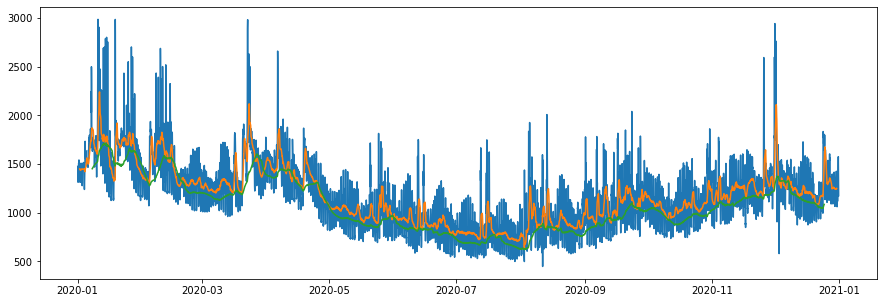

In [186]:
remove_cycle = lambda x,c : (x[0] + (np.cumsum(x[c:].values - x[:-c]))/c).shift(c)
plt.figure(figsize=(15,5))
plt.plot(remove_cycle(data,1))
plt.plot(remove_cycle(data,24))
plt.plot(remove_cycle(data,168))

In [219]:
remove_cycle(data,24),remove_cycle2(data,24)

(CTime
 2020-01-01 00:00:00            NaN
 2020-01-01 01:00:00            NaN
 2020-01-01 02:00:00            NaN
 2020-01-01 03:00:00            NaN
 2020-01-01 04:00:00            NaN
                           ...     
 2020-12-30 19:00:00    1244.314607
 2020-12-30 20:00:00    1247.758190
 2020-12-30 21:00:00    1247.331223
 2020-12-30 22:00:00    1247.899358
 2020-12-30 23:00:00    1249.783065
 Freq: H, Name: F-RVK-ANA-RS301-RS, Length: 8760, dtype: float64,
 CTime
 2020-01-01 00:00:00            NaN
 2020-01-01 01:00:00            NaN
 2020-01-01 02:00:00            NaN
 2020-01-01 03:00:00            NaN
 2020-01-01 04:00:00            NaN
                           ...     
 2020-12-30 19:00:00    1246.090730
 2020-12-30 20:00:00    1249.534313
 2020-12-30 21:00:00    1249.107346
 2020-12-30 22:00:00    1249.675481
 2020-12-30 23:00:00    1251.559188
 Freq: H, Name: F-RVK-ANA-RS301-RS, Length: 8760, dtype: float64)

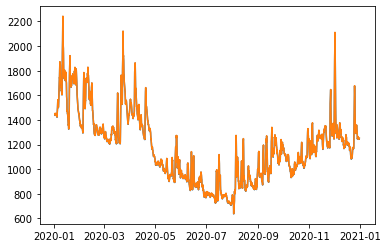

In [225]:
remove_cycle = lambda x,c : (x[0] + (np.cumsum(x[c:].values - x[:-c]))/c).shift(c)
remove_cycle2 = lambda x,c : (x[c] + (np.cumsum(x[c:].values - x[:-c]))/c).shift(c)
# plt.plot(data)
plt.plot(remove_cycle(data,24))
plt.plot(remove_cycle2(data,24))
# plt.xlim(data.index[1900],data.index[2100])


(3000.0, 4000.0)

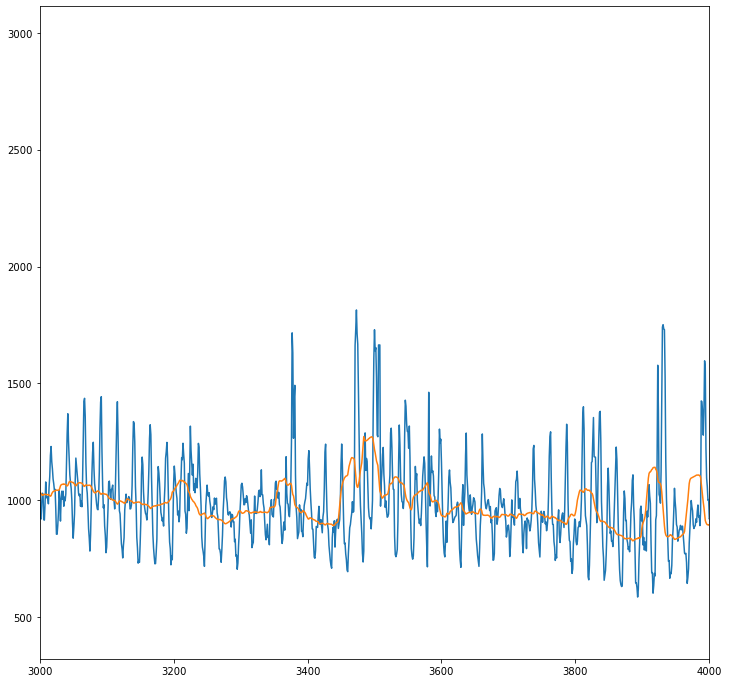

In [163]:
plt.figure(figsize=(12,12))
plt.plot(data.values)
plt.plot(inverted)
# plt.xlim(4000,4500)
plt.xlim(3000,4000)

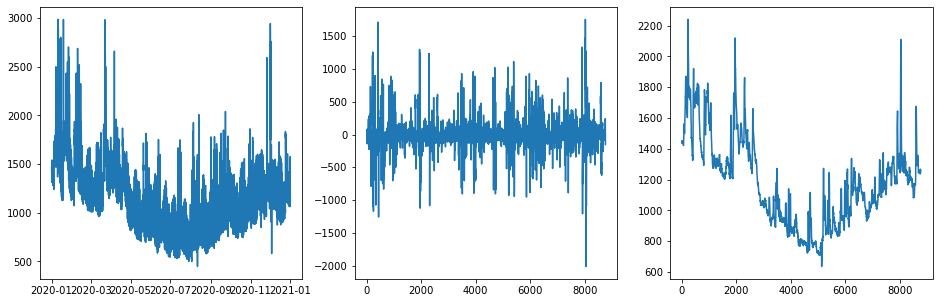

In [158]:
f,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(16,5))

data = y_flow #[np.sin(np.radians(i)) for i in range(360)] + [np.sin(np.radians(i)) for i in range(360)]
lota = 24
diff = difference(data, lota)
inverted = np.cumsum(diff)/lota + data[0]

ax1.plot(data)
ax2.plot(diff)
ax3.plot(inverted)
plt.show()

(2000.0, 2500.0)

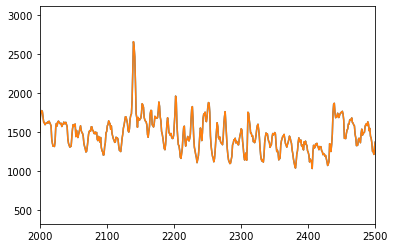

In [134]:
# plt.plot(np.arange(len(data)),data.values)
# plt.plot(np.arange(lota,len(data)+lota),data)
plt.plot(np.arange(-lota,len(data)-lota),data)

plt.plot(np.arange(len(inverted)),inverted)
# plt.plot(np.arange(lota,len(inverted)+lota),inverted)
# plt.plot(np.arange(-lota,len(inverted)-lota),inverted)
plt.xlim(2000,2500)

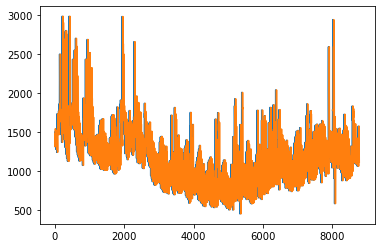

In [95]:
lota = 24
diff = difference(y_flow,lota)
inverted = [inverse_difference(y_flow[i], diff[i]) for i in range(len(diff))]
plt.plot(inverted)
plt.plot(y_flow.values)
plt.show()

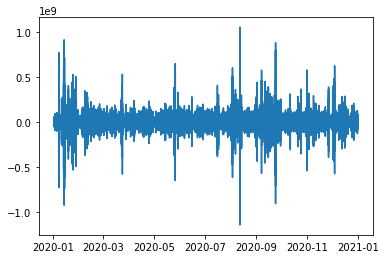

In [73]:
differenced = np.diff(y_flow,24)
y_flow_re = y_flow.copy()
y_flow_re = y_flow_re[24:]
y_flow_re.iloc[1:] = 0

plt.plot(y_flow_re + np.cumsum(differenced))

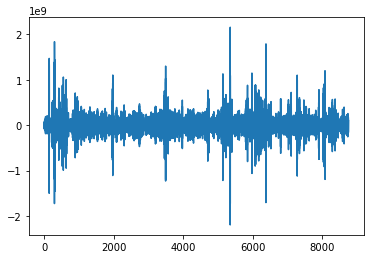

In [57]:
plt.plot()

In [21]:
fft_values_abs = np.abs(fft_values)

In [54]:
from sklearn.decomposition import NMF

In [55]:
# NMF

In [52]:
7*24

168